## Introduction

This data was taken from [University of California, Irvine's Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29). The features in the dataset are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.  They describe the characteristics of the cell nuclei present in the image. A few of the images can be found [here](http://www.cs.wisc.edu/~street/images/). 

Some information on the attributes of the data (taken from UCI's website) are as follows:

**1. For the diagnostic dataset:**

1) ID number

2) Diagnosis (M = malignant, B = benign)

3-32) Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.


**2. For the prognostic dataset:**

1) ID number

2) Outcome (R = recur, N = nonrecur)

3) Time (recurrence time if field 2 = R, disease-free time if 
	field 2	= N)
    
4-33) Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)

Several of the papers listed above contain detailed descriptions of
how these features are computed. 

The mean, standard error, and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features.  For instance, field 4 is Mean Radius, field
14 is Radius SE, field 24 is Worst Radius.

Values for features 4-33 are recoded with four significant digits.

_34) Tumor size - diameter of the excised tumor in centimeters
35) Lymph node status - number of positive axillary lymph nodes observed at time of surgery_

# 1. Extraction, Transformation & Loading (ETL)
***

### 1.1 Import the necessary modules

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from pandas_profiling import ProfileReport as PR

### 1.2 Import the data

There are two sets of data: one is a diagnostic set of data - which is the first time a patient is diagnosed. There is also a prognostic dataset - this is to determine whether or not the cancer came back. __It will be interesting to see if there is an overlap between the patients (based on the patient ID).__ This will tell us if there were patients that came back after their surgery - some additional insight on the type of cancer

In [2]:
diagnostic_data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
prognostic_data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wpbc.data"
diagnostic_data = pd.read_csv(diagnostic_data_url, header=None)
prognostic_data = pd.read_csv(prognostic_data_url, header=None)

In [3]:
# name the columns
diagnostic_column_names = ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
                 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
                 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
                 'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se',
                 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
                 'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 
                 'fractal_dimension_worst']
diagnostic_data.columns = diagnostic_column_names
diagnostic_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
diagnostic_data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
diagnostic_data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

__There are no missing values.__

In [6]:
diagnostic_data.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave_points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


#### 1.2.1 Use the prognosis dataset and merge it with the diagnostic dataset on the basis of the patient ID.

In [7]:
prognostic_column_names = ['id', 'outcome', 'time', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
                 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
                 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
                 'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se',
                 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
                 'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 
                 'fractal_dimension_worst', 'tumor_size','lymph_node_status']
prognostic_data.columns = prognostic_column_names
prognostic_data.head()

,id,outcome,time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,tumor_size,lymph_node_status
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0


In [8]:
prognostic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       198 non-null    int64  
 1   outcome                  198 non-null    object 
 2   time                     198 non-null    int64  
 3   radius_mean              198 non-null    float64
 4   texture_mean             198 non-null    float64
 5   perimeter_mean           198 non-null    float64
 6   area_mean                198 non-null    float64
 7   smoothness_mean          198 non-null    float64
 8   compactness_mean         198 non-null    float64
 9   concavity_mean           198 non-null    float64
 10  concave_points_mean      198 non-null    float64
 11  symmetry_mean            198 non-null    float64
 12  fractal_dimension_mean   198 non-null    float64
 13  radius_se                198 non-null    float64
 14  texture_se               1

There are only 198 rows in the prognosis dataset - much lesser than the diagnosis dataset and this creates a sample size issue. More data is always considered better for building models. However, we will continue to explore the merged dataset so as to further do some research on the cancer data

In [9]:
merged_data = diagnostic_data.merge(prognostic_data, on='id',)
merged_data.head()

,id,diagnosis,radius_mean_x,texture_mean_x,perimeter_mean_x,area_mean_x,smoothness_mean_x,compactness_mean_x,concavity_mean_x,concave_points_mean_x,...,perimeter_worst_y,area_worst_y,smoothness_worst_y,compactness_worst_y,concavity_worst_y,concave_points_worst_y,symmetry_worst_y,fractal_dimension_worst_y,tumor_size,lymph_node_status
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,159.1,1949.0,0.1188,0.3449,0.3414,0.20320,0.4334,0.09067,2.5,0
1,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,107.3,733.2,0.1706,0.4196,0.5999,0.17090,0.3485,0.11790,2.5,0
2,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,152.6,1593.0,0.1144,0.3371,0.2990,0.19220,0.2726,0.09581,1.5,?
3,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,106.2,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,2.0,1
4,845636,M,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,...,123.8,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452,2.0,0


In [10]:
merged_data.describe()

,id,radius_mean_x,texture_mean_x,perimeter_mean_x,area_mean_x,smoothness_mean_x,compactness_mean_x,concavity_mean_x,concave_points_mean_x,symmetry_mean_x,...,texture_worst_y,perimeter_worst_y,area_worst_y,smoothness_worst_y,compactness_worst_y,concavity_worst_y,concave_points_worst_y,symmetry_worst_y,fractal_dimension_worst_y,tumor_size
count,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,...,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,2.189134e+06,17.267482,21.200288,113.879065,957.191367,0.102762,0.141214,0.154181,0.085188,0.192135,...,28.972230,139.214317,1382.828777,0.145216,0.371558,0.445449,0.181000,0.330676,0.091888,2.787050
std,3.069986e+06,3.256023,3.377485,22.104514,369.183019,0.012826,0.050302,0.072532,0.034906,0.026874,...,5.089798,28.460439,575.144900,0.022017,0.158809,0.171064,0.045165,0.073964,0.018958,1.848651
min,8.571500e+04,10.950000,11.890000,71.900000,361.600000,0.074970,0.046050,0.023980,0.020310,0.146700,...,17.040000,85.100000,508.100000,0.093870,0.051310,0.023980,0.028990,0.156500,0.055040,0.400000
25%,8.555940e+05,14.825000,18.810000,96.780000,680.300000,0.094010,0.109400,0.105200,0.060540,0.172650,...,25.360000,117.700000,930.100000,0.131050,0.263300,0.329950,0.153250,0.281100,0.078680,1.500000
50%,8.774860e+05,17.190000,21.380000,113.400000,928.300000,0.102600,0.131700,0.145700,0.085910,0.188500,...,29.020000,135.100000,1284.000000,0.144600,0.354700,0.415900,0.182000,0.319800,0.090090,2.500000
75%,9.137985e+05,19.445000,23.265000,128.600000,1168.000000,0.110400,0.170000,0.200550,0.098760,0.209450,...,32.770000,159.450000,1684.500000,0.155500,0.433000,0.571350,0.208850,0.364700,0.102650,3.500000
max,9.113538e+06,28.110000,30.620000,188.500000,2499.000000,0.144700,0.311400,0.426800,0.201200,0.304000,...,42.790000,232.200000,3903.000000,0.222600,0.937900,1.170000,0.290300,0.577400,0.144600,10.000000


The `describe()` feature has information about all columns except for 1 - the `lymph_node_status` column. Added to this, we can see in the head of the `merged_data` dataset that there is a value `?` corresponsing to the `lymph_node_status` column. This is clearly a missing value and needs to be dealt with. The `info` for the dataset revealed no missing values in this column, and also listed this as the data type `object`. These issues need to be dealt with.

In [11]:
# remove the rows with the missing values
merged_data = merged_data[merged_data.lymph_node_status != '?']
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 0 to 138
Data columns (total 66 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         136 non-null    int64  
 1   diagnosis                  136 non-null    object 
 2   radius_mean_x              136 non-null    float64
 3   texture_mean_x             136 non-null    float64
 4   perimeter_mean_x           136 non-null    float64
 5   area_mean_x                136 non-null    float64
 6   smoothness_mean_x          136 non-null    float64
 7   compactness_mean_x         136 non-null    float64
 8   concavity_mean_x           136 non-null    float64
 9   concave_points_mean_x      136 non-null    float64
 10  symmetry_mean_x            136 non-null    float64
 11  fractal_dimension_mean_x   136 non-null    float64
 12  radius_se_x                136 non-null    float64
 13  texture_se_x               136 non-null    float64

We went to 136 non-null values from 139. Awesome! How do we verify that all the values in the column `lymph_node_status` are numerical? We will try to convert the data type of this column to `float`. If there are no errors, our task was successful.

In [12]:
# change the data type and check the info
merged_data.lymph_node_status = merged_data.lymph_node_status.astype('float')
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 0 to 138
Data columns (total 66 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         136 non-null    int64  
 1   diagnosis                  136 non-null    object 
 2   radius_mean_x              136 non-null    float64
 3   texture_mean_x             136 non-null    float64
 4   perimeter_mean_x           136 non-null    float64
 5   area_mean_x                136 non-null    float64
 6   smoothness_mean_x          136 non-null    float64
 7   compactness_mean_x         136 non-null    float64
 8   concavity_mean_x           136 non-null    float64
 9   concave_points_mean_x      136 non-null    float64
 10  symmetry_mean_x            136 non-null    float64
 11  fractal_dimension_mean_x   136 non-null    float64
 12  radius_se_x                136 non-null    float64
 13  texture_se_x               136 non-null    float64

__Job done!!__ We will now move on with the analysis of the diagnostic dataset first, as that's our primary dataset. Later, we will explore how the merged dataset looks and we will try to find out relationships between the diagnosis and prognosis and the strength of the relationship. But **first**, we will subset our data to only the important features.

The dataset contains columns with data for the mean radius of a cell, the standard error in the radius and the worst radius. The standard error and worst radius are redundant in my opinion, since the mean radius covers the dimensionality of the cells. In addition to this, the features such as perimeter and area of the cell are directly related to the radius of the cell. These are also the redundant features. we will subset the data such that the redundant features are removed.

In [13]:
df_diagnosis = diagnostic_data.drop(['id','radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'perimeter_mean', 'area_mean'], axis=1)
df_diagnosis.head(3)

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,20.57,17.77,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,19.69,21.25,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999


Awesome! Since our data now only consists of the most relevant features, we can do some exploratory data analysis on the dataset and find patterns and correlations.
***

# 2. Exploratory Data Analysis
***

We will go about exploring our diagnostic dataset to see if we can derive any insights from the data. Our data doesn't have any missing values and has columns of the right data type. We have also identified that our target variable is `diagnosis`. Let's see which features relate more strongly with our target variable.

First, let's check the distribution of the diagnosis.

Text(0.5, 1.0, 'Frequency of Malignant and Benign Outcomes')

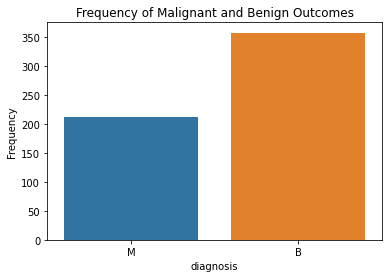

In [14]:
# Make a countplot for the diagnosis column
sns.countplot(x='diagnosis', data=df_diagnosis)
plt.ylabel('Frequency')
plt.title('Frequency of Malignant and Benign Outcomes')

The data doesn't seem equally distributed, but is still well distributed.

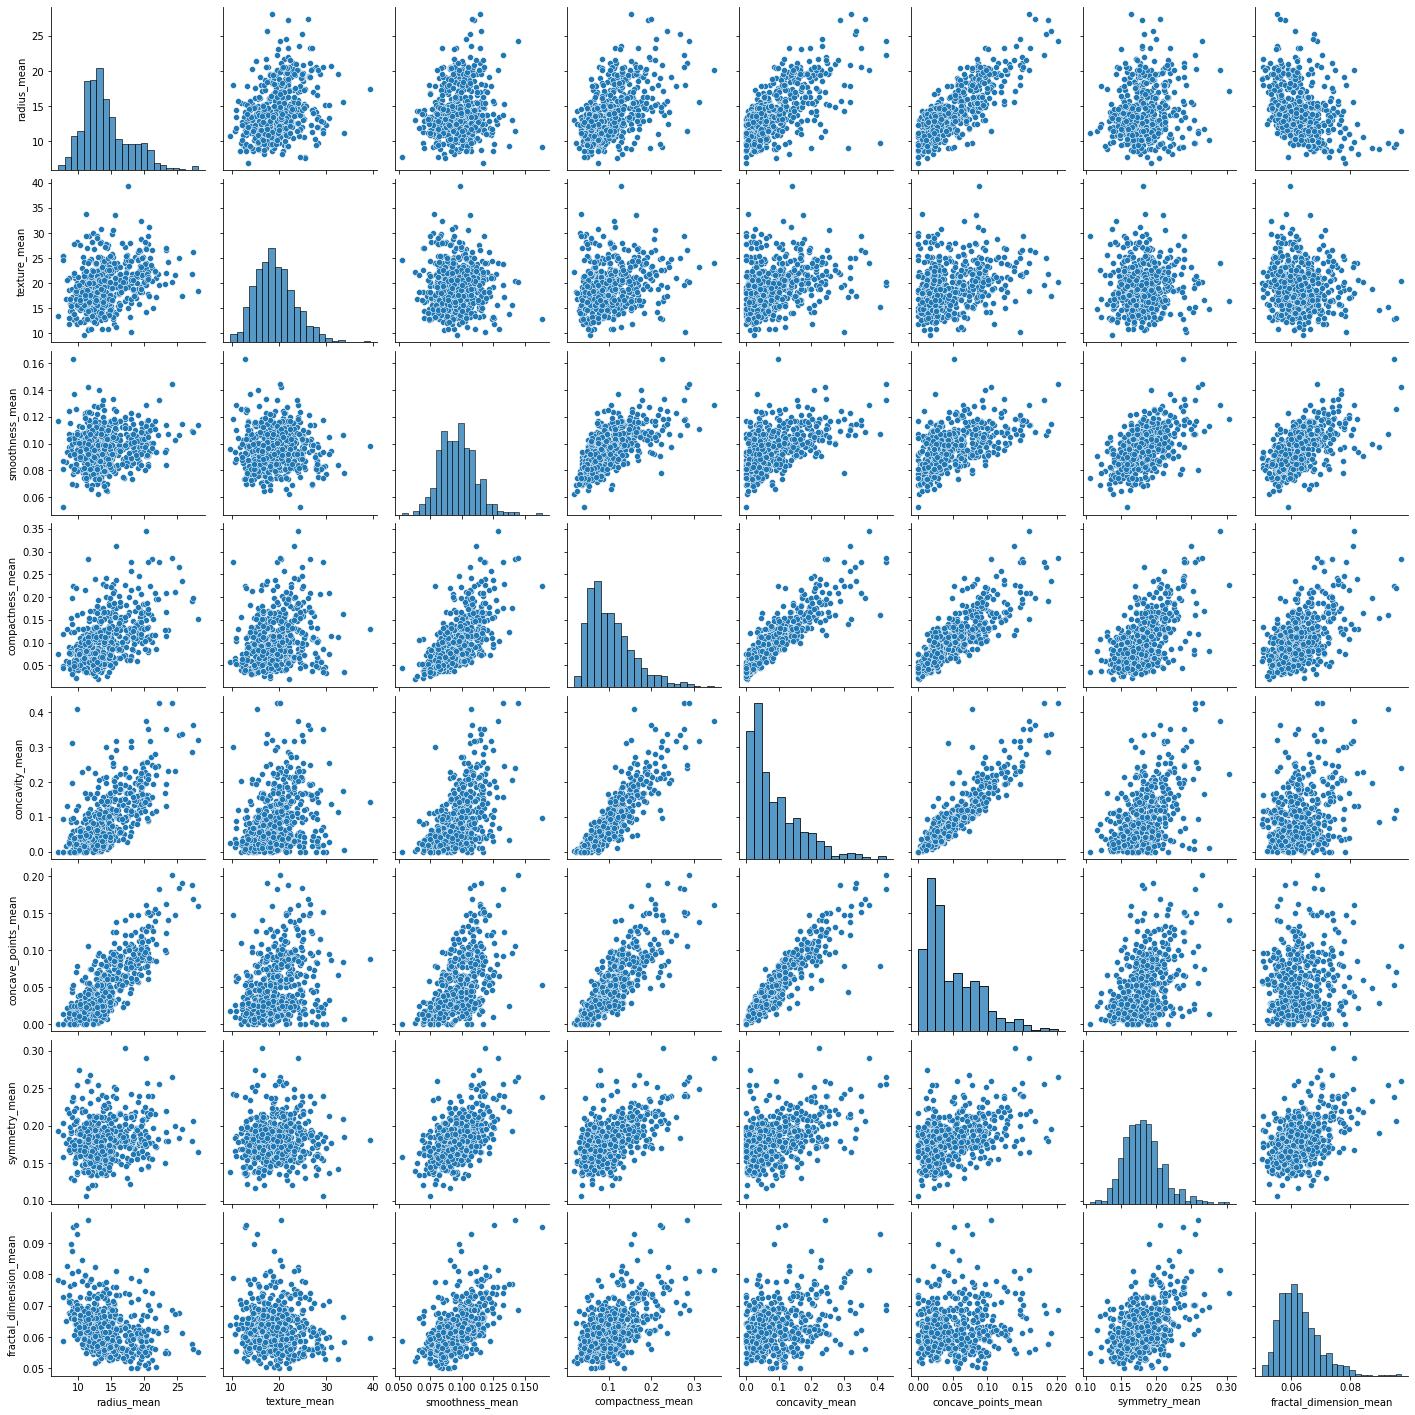

In [15]:
sns.pairplot(df_diagnosis)

From the pairplot, it is clear that there are some highly correlated features and some not-so-correlated ones. The correlation can be visualized using the `heatmap` feature of seaborn.

<AxesSubplot:>

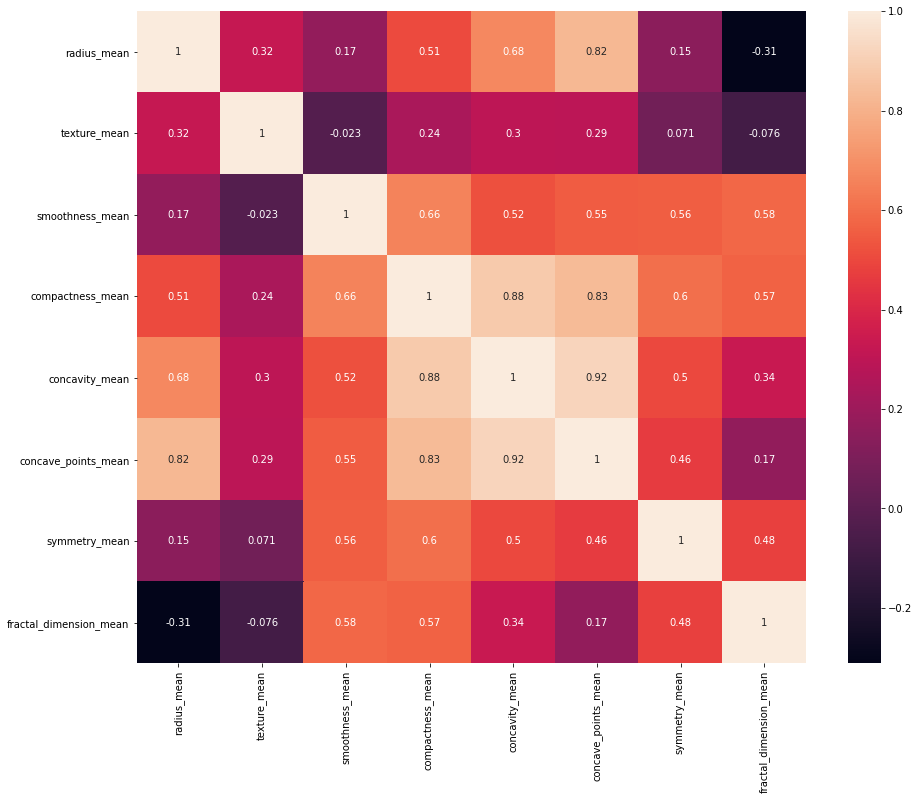

In [16]:
# Plot the heatmap
plt.figure(figsize=(15,12))
sns.heatmap(df_diagnosis.corr(), annot=True)

This plot shows that the variables `concavity_mean`, `compactness_mean` and `concave_points_mean` are highly correlated with each other, which can cause them to be redundant in our model going forward. We will choose the `compactness_mean` to stay and get rid of the other two in our final dataset.

In [17]:
df = df_diagnosis.drop(['concavity_mean','concave_points_mean'], axis=1)
df.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,0.11840,0.27760,0.2419,0.07871
1,M,20.57,17.77,0.08474,0.07864,0.1812,0.05667
2,M,19.69,21.25,0.10960,0.15990,0.2069,0.05999
3,M,11.42,20.38,0.14250,0.28390,0.2597,0.09744
4,M,20.29,14.34,0.10030,0.13280,0.1809,0.05883


Let's look at the average of each of these features that affect the diagnosis. For example, is the mean radius of the cells related to the diagnosis in some way?

In [18]:
df.groupby('diagnosis').mean()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean
diagnosis,,,,,,
B,12.146524,17.914762,0.092478,0.080085,0.174186,0.062867
M,17.462830,21.604906,0.102898,0.145188,0.192909,0.062680


D:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 20.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='diagnosis', ylabel='radius_mean'>

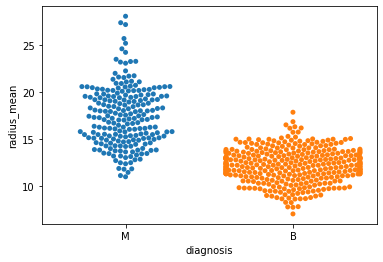

In [19]:
# Radius and diagnosis
sns.swarmplot(x='diagnosis', y='radius_mean', data=df_diagnosis)

Clearly, the malignant cells seem to have a larger mean radius, with both the minimum and maximum radii being more than that for the benign cancer cells. The next step will be to *binarize* my categorical target variable. I will use `LabelEncoder` for this purpose.

In [20]:
le = LabelEncoder()
df.diagnosis = le.fit_transform(df.diagnosis)
df.head(3)

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean
0,1,17.99,10.38,0.11840,0.27760,0.2419,0.07871
1,1,20.57,17.77,0.08474,0.07864,0.1812,0.05667
2,1,19.69,21.25,0.10960,0.15990,0.2069,0.05999


<AxesSubplot:>

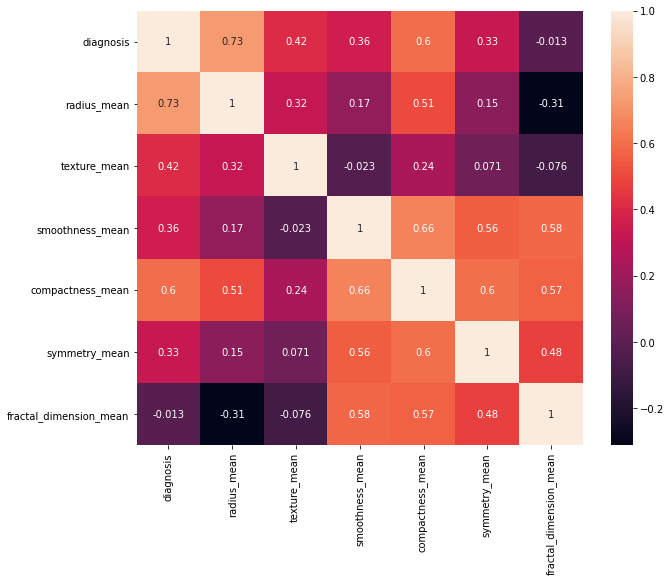

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

With respect to the `diagnosis` column, it seems that the `compactness_mean` and `radius_mean` are highly correlated to the tumor type (benign or malignant).

**Here, malignant=1 and benign=0**. 

There are other features that are moderately correlated, but it seems that the `fractal_dimension_mean` isn't correlated at all, since the value is so close to 0. However, before we dismiss this column as insignificant, we first need to make sure that it is.

**H0:** The fractal dimension data is actually very important in determining whether or not the cancer cell is benign or malignant and the data we have is an exception.

**HA:** The fractal dimension isn't important in determining whether or not a cell is benign or malignant.


We will do the statistical tests in the next section of creating our model.